# Pneumonia Diagnosis Using Chest X-Ray Images

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

#### Performance Metrics : 
        1. Confusion Matrix
        2. Precision, Recall
Precision also cannot be taken as single metric and has less significance than recall for this dataset because we want to minimize false negative.

False negative has to be intuitively minimized because falsely diagnosing a patient of pneumonia as not having a pneumonia is a much larger deal than falsely diagnosing a healthy person as a pneumonia patient which is our major concern . That is why we are making this model . To reduce the mistakes done by doctors accidentally .

##### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from pathlib import Path
import cv2
from keras import backend as K
from keras.utils import plot_model
import pydot, graphviz
from IPython.display import Image
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

We will first go through the training data and do some analysis on that like number of samples per class,etc.
The training directory has two another sub-directories:
* Pneumonia : This directorty has all samples X-ray images which descibes pneumonia.
* Normal : These are the images which describes normal cases.

In [4]:
# Get the path for pneumonia and normal sub-directories
pneumonia = 'Data/train/PNEUMONIA'
normal = 'Data/train/NORMAL'
pneumonia1 = Path(pneumonia)
normal1 = Path(normal)

pneumonia_name = pneumonia1.glob('*.jpeg') #listing all the images names from pneumonia class
normal_name = normal1.glob('*.jpeg') #listing all the images names from non-pneumonia class

training_data = [] #Empty list to combine

for img in pneumonia_name:
    training_data.append((img, 0))
for img in normal_name:
    training_data.append((img, 1))

In [5]:
df = pd.DataFrame(training_data, columns = ['image_name', 'label'], index = None)
df.head()

,image_name,label
0,Data\train\PNEUMONIA\person1000_bacteria_2931....,0
1,Data\train\PNEUMONIA\person1000_virus_1681.jpeg,0
2,Data\train\PNEUMONIA\person1001_bacteria_2932....,0
3,Data\train\PNEUMONIA\person1002_bacteria_2933....,0
4,Data\train\PNEUMONIA\person1003_bacteria_2934....,0


In [6]:
df.tail()

,image_name,label
5211,Data\train\NORMAL\NORMAL2-IM-1406-0001.jpeg,1
5212,Data\train\NORMAL\NORMAL2-IM-1412-0001.jpeg,1
5213,Data\train\NORMAL\NORMAL2-IM-1419-0001.jpeg,1
5214,Data\train\NORMAL\NORMAL2-IM-1422-0001.jpeg,1
5215,Data\train\NORMAL\NORMAL2-IM-1423-0001.jpeg,1


In [7]:
df['label'].value_counts()

0    3875
1    1341
Name: label, dtype: int64

There are 3875 X-ray images of pnuemonia and 1341 images of normal patients.

Text(0,0.5,'Pnuemoina VS normal')

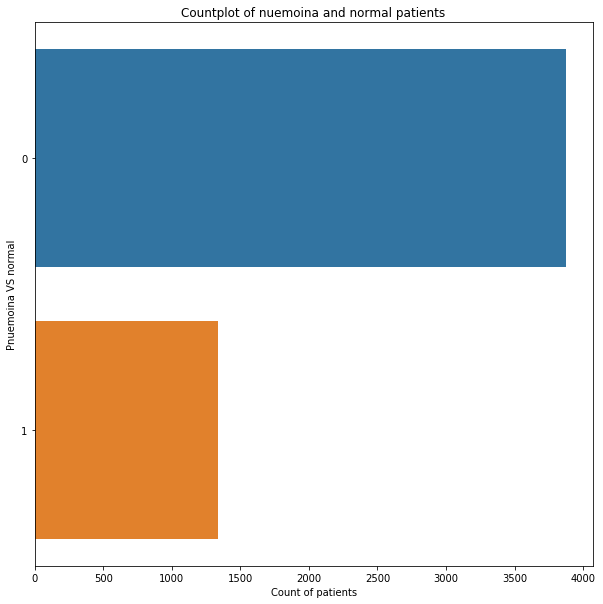

In [8]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'label', data =df)
plt.title('Countplot of nuemoina and normal patients')
plt.xlabel('Count of patients')
plt.ylabel('Pnuemoina VS normal')

As you can see from above plot the count of pnuemonia patients are almost 3 times more than the normal patients. So this is imbalanced dataset. Therefore validation accuracy won't be a good metric to analyze the model performance

In [9]:
pneumonia_data = df[df['label'] == 0]['image_name'].iloc[:10].tolist()
normal_data = df[df['label'] == 1]['image_name'].iloc[:10].tolist()

Visualizing some images of both the categories.

Text(0.5,1,'Normal')

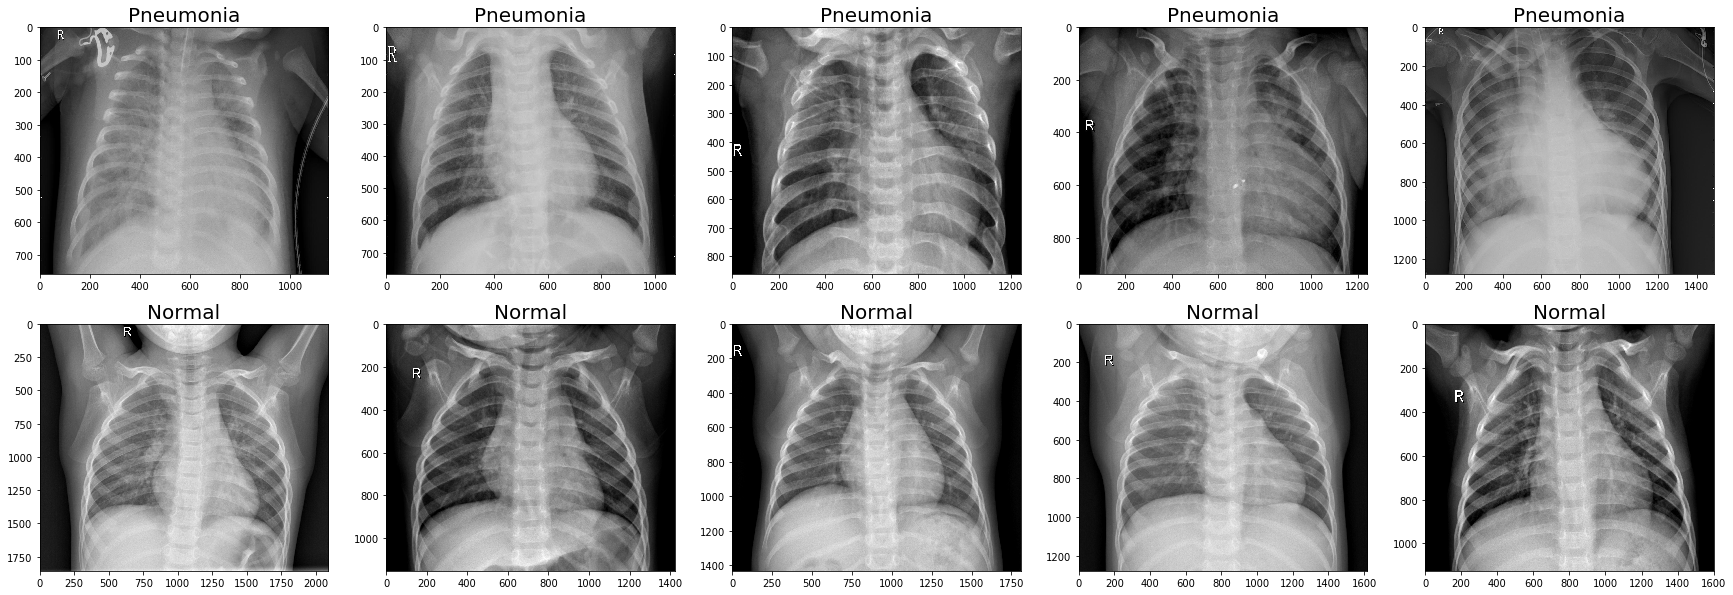

In [10]:
fig = plt.figure(figsize = (30, 10))
plt.subplot(2,5,1)
image = cv2.imread(str(pneumonia_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(pneumonia_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(pneumonia_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(pneumonia_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(pneumonia_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(normal_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(normal_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(normal_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(normal_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(normal_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

If you look carefully in above plots there are some cases where we won't be able to classify between a normal case and pneumonia case with our naked eyes but of course the expert peoples in medical domain can figure out difference between them.

Text(0.5,1,'Normal')

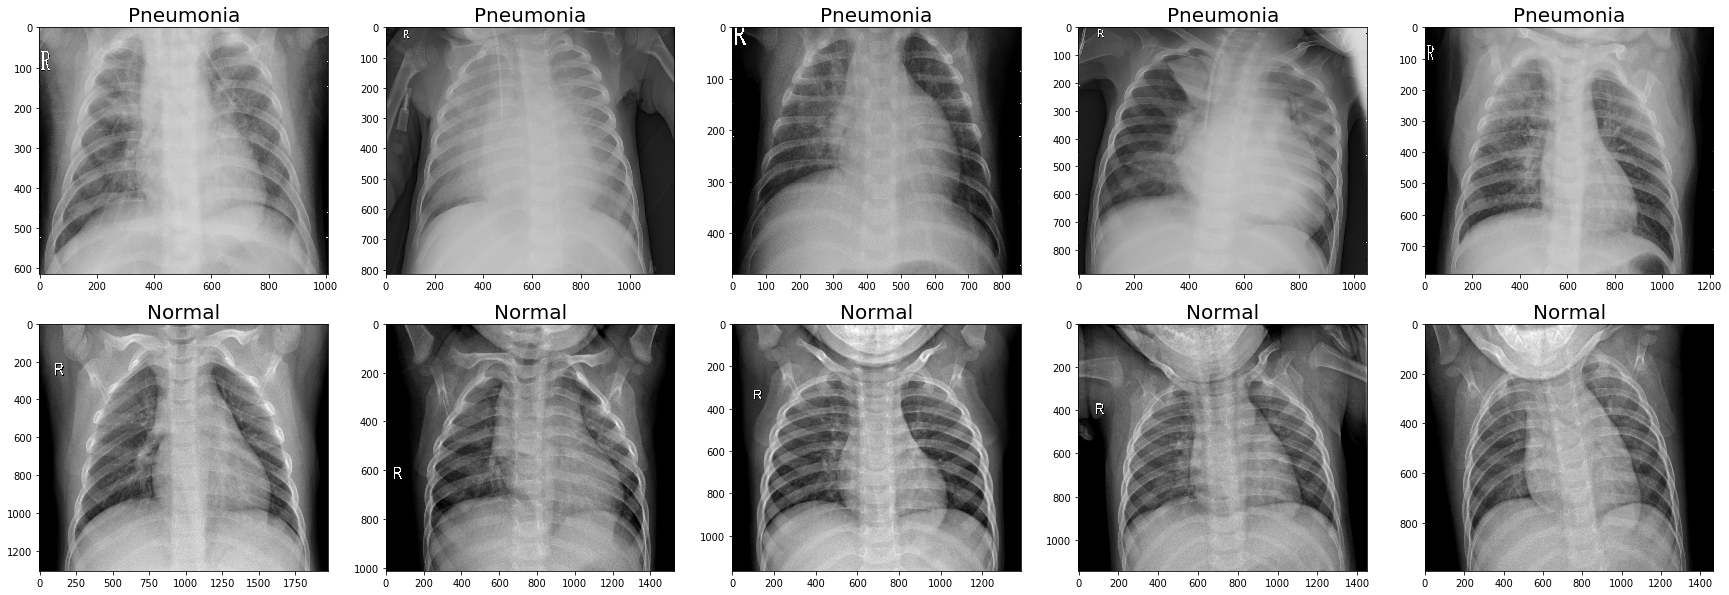

In [11]:
fig = plt.figure(figsize = (30, 10))
plt.subplot(2,5,1)
image = cv2.imread(str(pneumonia_data[5]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(pneumonia_data[6]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(pneumonia_data[7]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(pneumonia_data[8]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(pneumonia_data[9]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(normal_data[5]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(normal_data[6]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(normal_data[7]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(normal_data[8]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(normal_data[9]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

In [21]:
img_height, img_width = 256, 256
epochs = 32
batch_size = 16
train_dir ='Data/train'
validation_dir = 'Data/val'
test_dir = 'Data/test'
nb_train_samples = 5216
nb_validation_samples = 16

In [13]:
if K.image_data_format() == 'channel_first':
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

Building Convolutional Nueral Network architecutre.

In [14]:
model = Sequential()

#first convolutional layer
model.add(Conv2D(32, (3,3), input_shape = input_shape, padding ='same'))
model.add(Activation('relu'))

#second convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu', padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

#third convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#fourth convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#flatten
model.add(Flatten())

#first dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

#second dense layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))

#output layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 64)      256       
__________

In [16]:
#compiling the model
model.compile(optimizer =Adam(lr = 0.001, decay = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [17]:
train_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [18]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(img_width, img_height),
                batch_size=batch_size,
                class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [19]:
for data, labels in train_generator:
    print(data.shape)
    print(labels.shape)
    print(labels)
    break

(16, 256, 256, 3)
(16, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [22]:
validation_generator = train_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(img_width, img_height),
                    batch_size=batch_size,
                    class_mode='categorical')

Found 16 images belonging to 2 classes.


In [23]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(img_width, img_height),
                    batch_size=1,
                    shuffle = False,
                    class_mode='categorical')

Found 624 images belonging to 2 classes.


In [24]:
for data, labels in test_generator:
    print(data.shape)
    print(labels.shape)
    print(labels)
    break

(1, 256, 256, 3)
(1, 2)
[[1. 0.]]


In [25]:
print(test_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


Making Checkpoint each epoch to check and save the best model performance till last and also avoiding further validation loss drop due to overfitting.

In [26]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                       verbose = 0,
                       mode = 'auto',
                       save_best_only = True,
                       monitor='val_loss')

In [210]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=[checkpointer])

Epoch 1/32
326/326 [==============================] - 185s 568ms/step - loss: 0.7488 - acc: 0.6810 - val_loss: 0.8473 - val_acc: 0.4375
Epoch 2/32
326/326 [==============================] - 173s 529ms/step - loss: 0.5310 - acc: 0.7490 - val_loss: 1.5904 - val_acc: 0.5000
Epoch 3/32
326/326 [==============================] - 177s 542ms/step - loss: 0.4172 - acc: 0.8119 - val_loss: 1.3519 - val_acc: 0.5000
Epoch 4/32
326/326 [==============================] - 176s 541ms/step - loss: 0.3858 - acc: 0.8246 - val_loss: 1.3293 - val_acc: 0.5000
Epoch 5/32
326/326 [==============================] - 176s 539ms/step - loss: 0.3465 - acc: 0.8439 - val_loss: 1.5958 - val_acc: 0.5000
Epoch 6/32
326/326 [==============================] - 176s 539ms/step - loss: 0.3211 - acc: 0.8650 - val_loss: 1.0229 - val_acc: 0.5000
Epoch 7/32
326/326 [==============================] - 176s 539ms/step - loss: 0.3078 - acc: 0.8637 - val_loss: 1.5265 - val_acc: 0.5000
Epoch 8/32
326/326 [============================

Visualizing training and validation performance on dataset.

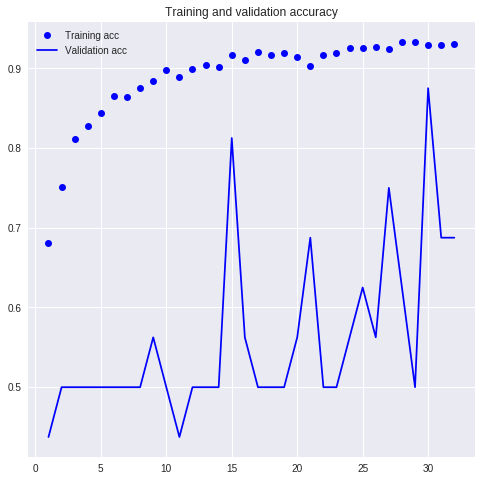

In [224]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

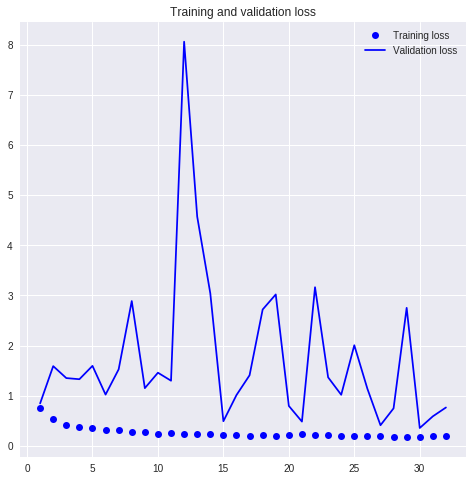

In [225]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Loading the model with minimum validation loss.
* NOTE : This is model will not be model trained at last epoch becuase we have used the keras callback function to save the best model at intermediate epochs.

In [28]:
model = load_model('model.h5')

In [29]:
scores = model.evaluate_generator(test_generator, steps = 624)

In [30]:
print("Loss on Test Data is", scores[0])
print("Accuracy on Test Data is", scores[1] * 100,"%")

Loss on Test Data is 0.35711445524981256
Accuracy on Test Data is 85.73717948717949 %


Since we are having unequal number of images in both the classes, therefore we can't take accuracy as metric to measure the model performance.

In [48]:
pred = model.predict_generator(test_generator, steps = 624)

In [49]:
pred[:5]

array([[0.8502388 , 0.14976124],
       [0.99770075, 0.00229921],
       [0.95368093, 0.04631906],
       [0.95523727, 0.04476276],
       [0.9716475 , 0.02835254]], dtype=float32)

In [50]:
pred = np.argmax(pred, axis = 1)

In [51]:
normal_test_dir = 'Data/test/NORMAL'
pneumonia_test_dir = 'Data/test/PNEUMONIA'

normal_test = Path(normal_test_dir).glob('*.jpeg')
pneumonia_test = Path(pneumonia_test_dir).glob('*.jpeg')

test_labels = []

for img in normal_test:
    label = to_categorical(0, num_classes = 2)
    test_labels.append(label)

for img in pneumonia_test:
    label = to_categorical(1, num_classes = 2) 
    test_labels.append(label)
    
test_labels = np.array(test_labels)

In [229]:
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [52]:
y_true = np.argmax(test_labels, axis = 1)

([<matplotlib.axis.YTick at 0x7f1d42eff0b8>,
 <a list of 2 Text yticklabel objects>)

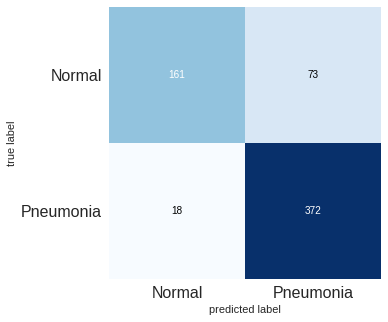

In [218]:
cm = confusion_matrix(y_true, pred)
plot_confusion_matrix(cm, figsize = (10, 5 ))
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)

In [236]:
print("Precision : ",372 / (372 + 73))
print("Recall : ",372 / (372 + 18))

Precision :  0.8359550561797753
Recall :  0.9538461538461539


Recall is 95% which is quite good.